In [1]:
import snsql
from snsql import Privacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn
from snsynth import Synthesizer
import numpy
import torch

In [2]:
privacy = Privacy(epsilon=1.0, delta=0.01)

In [3]:
trainx = pd.read_csv('trainx.csv')

In [4]:
testx = pd.read_csv('testx.csv')

Original Dataset
The original dataset of the hackathon is the panel study: "Socio-economic impact of COVID-19 on refugees" in Kenya from May 2020 to June 2022. It was conducted through a collaboration between the UNHCR, the World Bank, the Kenya National Bureau of Statistics and the University of California, Berkeley.

The dataset consists of eight waves distant by two to four months of Rapid Response Phone Survey with refugee households in Kenya. Its goal is originally to track the socioeconomic impacts of the COVID-19 pandemic and the recovery from it in order to inform a targeted response.

More details and explanations can be found on the UNHCR catalog here.

Challenge Dataset
The dataset available in the challenge has been curated to a smaller dataset of 58 columns and 11498 rows. Three of these columns are the differentially private columns (y) to query and predict on.

Data description
We describe here the resulting columns in x (the features) and y (the values to predict).

x features

Column name	Type	Question	Possible responses
hhsize	Categories	What is the number of people in the household	['1' < '2' < '3' < '4' ... '12' < '13' < '14' < '15+'] with 0 to 14 as ordinal values
head_gender	Categories	What is the gender of the household head	[0: 'Male' , 1: 'Female']
s2_q2_age	Numeric	What is the age of the household head	Float value
s2_q15b_schoolchildren	Numeric	What is the proportion of school-aged children (5-17 years) in the household	Float value
s2_q15c_youngchildren	Numeric	What is the proportion of young children (0-4 years) in the household	Float value
s2_q21_noadults	Numeric	How many other adults (18 and above) members are there in the household	Float value
s2_q24_numchild	Numeric	What is the proportion of children (0-17 years old) in the household	Float value
urban	Categories	Do you live an urban area or rural/refugee camp area	[0: 'Rural (or refugee camp)', 1: 'Urban']
s2_q10_mktcentre	Boolean	Is the current residence located within a town/trading center	1 or 0
s2_q19_floormat	Categories	What is the predominant floor material of the main dwelling unit	['Dung' < 'Vinyl Or Asphalt Strips' < 'Cement' < 'Earth/Sand' < 'Wood Planks/Shingles' < 'Palm/Bamboo' < 'Parquet Or Polished Wood' < 'Ceramic Tiles' < 'Carpet'] with 0 to 8 as ordinal values
s2_q20_wallmat	Categories	What is the predominant wall material of the main dwelling unit	['No Walls' < 'Mud/Cow Dung' < 'Cane/Palm/Trunks' < 'Grass/Reeds' < 'Cardboard' < 'Bamboo With Mud'< 'Stone With Mud'< 'Corrugated Iron Sheets' < 'Reused Wood' < 'Tent/Canvas' < 'Wood Planks/Shingles' < 'Stone With Lime/Cement' < 'Uncovered Adobe' < 'Covered Adobe' < 'Cement' < 'Cement Blocks' < 'Bricks' < 'Plywood'] with 0 to 17 as ordinal values
s2_q21a_powergrid	Boolean	Is the home physically connected to the electricity grid	1 or 0
s2_q23_anyphone	Numeric	In total, how many mobile phone numbers do all members of the household use	Integer value
ownasset_0	Boolean	Did the household own none of the following: Radio/Mattress/Charcoal/Refrigerator before March 2020	1 or 0
ownasset_1	Boolean	Did the household own a Radio before March 2020	1 or 0
ownasset_2	Boolean	Did the household own a Mattress before March 2020	1 or 0
ownasset_3	Boolean	Did the household own a Charcoal Jiko before March 2020	1 or 0
ownasset_4	Boolean	Did the household own a Refigerator before March 2020	1 or 0
s3_q5a_attendchurch	Categories	In the past 14 days, has any member of the household attended religious service personally	['Yes, both this week and last week', 'Yes, this week (in the past 7 days)', 'Yes, last week (between 14 to 7 days ago)', 'No'] with 0 to 3 as ordinal values
s3_q7_visitother	Boolean	In the past 14 days did anyone visit the household house, or did any household member visit another house	1 or 0
s5_q1	Numeric	How much, in total, did the household consume from its own agricultural or pastoral production in past 7 days	Float value in Ksh
s53_q6_hunger	Boolean	Did any adult of the household went hungry because of lack of food in the last 30 days	1 or 0
s53_q6_staple	Boolean	The household couldnt access to staple food in the last month at any time	1 or 0
s5_q38_worryfood	Boolean	Did the responder worry that the household would not have enough food in the last 30 days	1 or 0
s5_q39a_hungryadult	Numeric	What is the number of days where adults in the household have gone to bed hungry in the past 7 days	Float value
s5_q39b_hungrychild	Numeric	What is the number of days where children in the household have gone to bed hungry in the past 7 days	Float value
s5_q42a_meat	Boolean	Did any of the meals that the household ate yesterday include Meat or fish	1 or 0
s5_q42b_eggs	Boolean	Did any of the meals that the household ate yesterday include Eggs	1 or 0
s5_q40a_skippedadult	Numeric	What is the number of days where adults in the household skipped meals in the past 7 days	Float value
s5_q40b_skippedchild	Numeric	What is the number of days where children in the household skipped meals in the past 7 days	Float value
s5_q41a_nofoodadult	Numeric	What is the number of days where adults in the household have gone entire day without food in the past 7 days	Float value
s5_q41b_nofoodchild	Numeric	What is the number of days where children in the household have gone entire day without food in the past 7 days	Float value
s4_q1_agactivity	Boolean)	In the past 14 days, have any household members performed any agricultural or pastoral activities	1 or 0
s4_q12_num_ent	Numeric	In the last months, other than farming, what is the number of non-agricultural self-employed enterprises run by members of household	Float value
sum_s4_q19_earnings	Numeric	What is the total earnings/revenues of all self-employed entreprises of the household since the last survey	Float value
sum_s4_q19_laidoff	Numeric	What is the total number of employees laid off in all self-employed entreprises of the household since the last survey	Float value
sum_s4_q20_profits	Numeric	What is the total sum profit of all self-employed entreprises of the household since the last survey	Float value
sum_s4_q20_salestrend	Numeric	What is the total earnings / revenue of all self-employed entreprises of the household in a typical current 2-weeks period	Float value
sum_s4_q20c_survive	Numeric	At the current scale of operations, what is the number of weeks the household would survive without selling additional assets or getting additional assistance / loans to continue business operations (aggregated for all self-employed entreprises of the household)	Float value
s5_q3a_food	Numeric	What is the total household expenditure in Groceries / Food: Includes all meat, fish, eggs, dairy, oils, fats, vegetables, fruit, sugar, products and drinks	Float value in Ksh
s5_q3b_personal	Numeric	What is the total household expenditure in household and personal items: Includes soap, cleaning agents, toilet paper/tissues, air freshener, shoe polish, insecticide, matches, candles, toiletries, cosmetics	Float value in Ksh
s5_q3c_durables	Numeric	What is the total household expenditure in Assets / Durables : Includes vehicles (car, boat, bike, motorbike, handcarts, etc.), furniture (bed, chair, vases, mirror, etc.), kitchen and other equipment (cutlery, pots, pans, plates, etc.), electronic equipment, (lamps, mobile phone, television, etc.), tools and livestock	Float value in Ksh
s5_q3d_services	Numeric	What is the total household expenditure in Local Services: Includes maize grinding, haircuts, prepared meals eaten outside the home, bicycle repair, recreation, etc	Float value in Ksh
s5_q3e_comms	Numeric	What is the total household expenditure in Communication: Includes airtime, internet and other phone expenses	Float value in Ksh
s5_q3f_housing	Numeric	What is the total household expenditure in Housing: Includes rent, mortgage, home maintenance, and repairs	Float value in Ksh
s5_q3g_utilities	Numeric	What is the total household expenditure in Energy and Utilities: Includes electricity, water, firewood, charcoal, kerosene	Float value in Ksh
s5_q3h_transport	Numeric	What is the total household expenditure in Transport: Includes petrol, tolls, taxi/bus/matatu/boda/piki/train/flight fare, hotels stays (NOT including medical reasons)	Float value in Ksh
s5_q3i_medical	Numeric	What is the total medical expenses: Includes consultation fees, medicines, hospital costs, lab test costs, ambulance costs, and related transport (in Ksh)	Float value in Ksh
s7_q1_receivegifthh	Boolean	In the past 14 days, did anyone in the household receive a gift / assistance of money or goods from someone outside the household?	1 or 0
s7_q2_sendgift	Boolean	In the past 14 days, did anyone in the household give or send money or goods to someone outside the household?	1 or 0
s9_q11_medsoutstock	Categories	In the last week, has anyone in the household been unable to buy medicine?	['No, get it for free' < 'No' < 'Yes'] with 0 to 2 as ordinal values
wave	Numeric	Panel wave (id the the questionary)	Integer value
s5_q2_receivedfood	Boolean	Did you receive food as a gift in past 7 days	1 or 0
s5_q4_rent	Boolean	Do you rent your accommodation?	1 or 0
s9_q4_hospitalvisit	Boolean	In the past 30 days, did any member visit hospital for any reason?	1 or 0
For boolean columns, 1 is for 'Yes' and 0 is for 'No'.

NaNs values were replaced by -1.

y (train_y: differentially private, test_y: to predict)

Column name	Type	Question	Possible responses
y_financial_actions	Boolean	In the past 14 days, did anyone in the household take out a new loan to use on or sell any livestock or other household assets to generate income [Vehicles, Furniture, kitchen or electronic equipment, tools] ?	1 or 0
y_financial_help	Boolean	In the past 14 days, did anyone in this household receive a gift / assistance of money or goods from a government program, a non-governmental organization/community group or an individual politician/government official?	1 or 0
y_return	Boolean	Does the household not plan to return to their home country in the foreseeable future ?	1 or 0
1 is for 'Yes' and 0 is for 'No'.

Test-Train split
The test set is 20% of stratified sampling from the 8 waves of the questionnaire. This means that in each wave, 20% of the rows were randomly sampled to be in the test set (test_x and test_y) and the 80% remaining rows are in the train set (train_x, train_y).

As a participant, you have full access to train_x and use differential privacy to understand and modelise its relation with train_y. Based on your model, you then use test_x to predict test_y.

In [5]:
trainx.columns

Index(['Unnamed: 0', 'urban', 'hhsize', 'head_gender', 's2_q10_mktcentre',
       's2_q19_floormat', 's2_q20_wallmat', 's2_q21a_powergrid', 'ownasset_0',
       'ownasset_1', 'ownasset_2', 'ownasset_3', 'ownasset_4',
       's3_q5a_attendchurch', 's3_q7_visitother', 's53_q6_hunger',
       's53_q6_staple', 's5_q38_worryfood', 's5_q42a_meat', 's5_q42b_eggs',
       's5_q2_receivedfood', 's5_q4_rent', 's7_q2_sendgift',
       's9_q4_hospitalvisit', 's9_q11_medsoutstock', 's2_q15b_schoolchildren',
       's2_q15c_youngchildren', 's2_q21_noadults', 's2_q23_anyphone',
       's2_q24_numchild', 's2_q2_age', 's4_q12_num_ent', 's5_q1',
       's5_q39a_hungryadult', 's5_q39b_hungrychild', 's5_q3a_food',
       's5_q3b_personal', 's5_q3c_durables', 's5_q3d_services', 's5_q3e_comms',
       's5_q3f_housing', 's5_q3g_utilities', 's5_q3h_transport',
       's5_q3i_medical', 's5_q40a_skippedadult', 's5_q40b_skippedchild',
       's5_q41a_nofoodadult', 's5_q41b_nofoodchild', 'wave',
       'sum_s4_q1

In [6]:
given_w_fin_act = [0, -2, 0, 0, 2, 2, 1, 3, 1, 1, 1, 3, 0, 2, 1, 1, 1, 0, 0, -2, -1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, -1, -2, 1, 2, 2, 2, 1, 1, 1, 1, 1, -1, -1, -2, -3, 0, -1, 1, -1, -1, 0, -1, -1, 0, 0, 0]
given_w_fin_help = [2, -2, 0, 1, -1, -1, 1, 1, 1, 1, 1, 0, -2, 1, -1, -1, -1, -2, -1, 1, -1, 1, 0, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -2, 1, 2, 2, 2, 1, 1, 1, 1, 1, -2, -2, -3, -4, 0, -1, 1, -1, -1, -1, -1, 1, 0, 0, 0]
given_w_ret = [1, -2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, -2, 1, 0, 0, 0, 1, 2, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -2, 1, 2, 3, 4, 4, 2, 1, 1, 1, -2, -2, -3, -4, 0, 1, -1, 1, 2, 1, 1, 1, 0, 0, 0]

In [7]:
trainx.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,s5_q41a_nofoodadult,s5_q41b_nofoodchild,wave,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity
count,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,...,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,4599.000000,0.238287,3.531797,0.450919,0.061202,2.808675,6.670834,0.426242,0.186759,0.408631,...,0.301555,0.069355,4.415806,2185.067942,0.582563,632.814328,755.134036,0.570714,0.027068,0.016306
std,2655.666897,0.426823,3.165412,0.500662,0.825274,1.381756,5.477893,0.494557,0.389739,0.491608,...,0.847305,0.543773,2.258913,14572.437739,15.521251,2909.461799,3770.269176,2.800688,0.466566,0.135771
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2299.500000,0.000000,1.000000,0.000000,-1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4599.000000,0.000000,3.000000,0.000000,0.000000,3.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6898.500000,0.000000,5.000000,1.000000,1.000000,3.000000,11.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9198.000000,1.000000,14.000000,1.000000,1.000000,8.000000,17.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,8.000000,540000.000000,594.000000,150000.000000,80000.000000,150.000000,1.000000,1.000000


In [8]:
# Adding offset so the '0's in the columns have value 
trainx_ref = pd.DataFrame()
for column in trainx:
    trainx_ref[column] = trainx[column] + 1 

In [9]:
# replacing the missing values with averages
for column in trainx:
    trainx_ref[column][trainx_ref[column] == 0] = trainx[column].mean()+1

C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\3693415543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref[column][trainx_ref[column] == 0] = trainx[column].mean()+1


In [10]:
# Normalising to give equal weights to all the columns
for column in trainx:
    trainx_ref[column] = trainx_ref[column]/max(trainx_ref[column])

In [11]:
trainx_ref['fin_act'] = 0
trainx_ref['fin_help'] = 0
trainx_ref['ret'] = 0
for ind in range(trainx_ref.shape[0]):
    trainx_ref['fin_act'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_act)
    trainx_ref['fin_help'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_help)
    trainx_ref['ret'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_ret)

C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\3291063501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref['fin_act'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_act)
C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\3291063501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainx_ref['fin_help'].iloc[ind] = sum(trainx_ref.iloc[ind][1:]*given_w_fin_help)
C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\3291063501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

<AxesSubplot: xlabel='ret'>

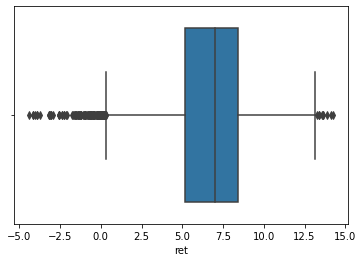

In [12]:
sns.boxplot(data = trainx_ref, x='ret')

<AxesSubplot: xlabel='fin_act'>

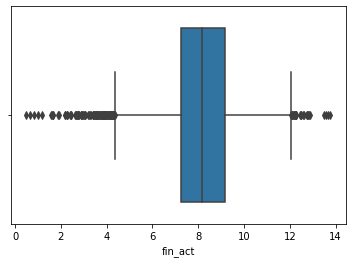

In [13]:
sns.boxplot(data = trainx_ref, x='fin_act')

<AxesSubplot: xlabel='fin_help'>

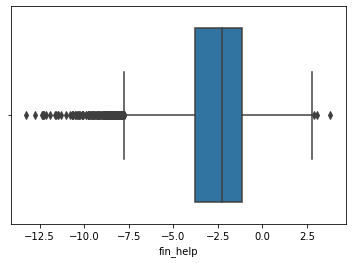

In [14]:
sns.boxplot(data = trainx_ref, x='fin_help')

In [15]:
trainx_ref.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity,fin_act,fin_help,ret
count,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.00000,9199.000000,...,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000,9199.000000
mean,0.500054,0.619345,0.307572,0.726563,0.696028,0.429167,0.509730,0.713121,0.59338,0.704316,...,0.004048,0.002660,0.004225,0.009452,0.010402,0.562660,0.508761,8.160311,-2.610093,6.636397
std,0.288691,0.213118,0.207016,0.248723,0.234765,0.144928,0.223631,0.247278,0.19487,0.245804,...,0.026986,0.026086,0.019396,0.047128,0.018548,0.163636,0.065569,1.484848,2.128847,2.521359
min,0.000109,0.500000,0.066667,0.500000,0.500000,0.111111,0.055556,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,0.471408,-13.265492,-4.422093
25%,0.250082,0.500000,0.133333,0.500000,0.500000,0.333333,0.426157,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,7.246910,-3.796986,5.159850
50%,0.500054,0.500000,0.266667,0.500000,0.530601,0.444444,0.444444,0.500000,0.50000,0.500000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,8.156287,-2.241972,7.026510
75%,0.750027,0.500000,0.400000,1.000000,1.000000,0.444444,0.666667,1.000000,0.50000,1.000000,...,0.000002,0.001681,0.000007,0.000012,0.006623,0.500000,0.500000,9.173886,-1.149491,8.401327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.767044,3.813127,14.256803


In [16]:
trainx_ref['fin_act'][trainx_ref['fin_act'] < 9.17] = 0
trainx_ref['fin_act'][trainx_ref['fin_act'] > 9.17] = 1
trainx_ref['fin_help'][trainx_ref['fin_help'] > -1.15] = 1
trainx_ref['fin_help'][trainx_ref['fin_help'] < -1.15] = 0
trainx_ref['ret'][trainx_ref['ret'] < 8.4] = 0
trainx_ref['ret'][trainx_ref['ret'] > 8.4] = 1

In [17]:
print(trainx_ref['fin_act'][trainx_ref['fin_act'] == 0].shape[0])
print(trainx_ref['fin_help'][trainx_ref['fin_help'] == 0].shape[0])
print(trainx_ref['ret'][trainx_ref['ret'] == 0].shape[0])

6895
6898
6899


In [18]:
print(trainx_ref['fin_act'][trainx_ref['fin_act'] == 1].shape[0])
print(trainx_ref['fin_help'][trainx_ref['fin_help'] == 1].shape[0])
print(trainx_ref['ret'][trainx_ref['ret'] == 1].shape[0])

2304
2301
2300


In [19]:
trainx_ref.drop(columns = ['Unnamed: 0'], inplace=True)

In [20]:
# Prepare test data:
testx_ref = pd.DataFrame()
for column in testx:
    testx_ref[column] = testx[column] + 1
    
for column in testx:
    testx_ref[column][testx_ref[column] == 0] = testx[column].mean()+1

for column in testx:
    testx_ref[column] = testx_ref[column]/max(testx_ref[column])

testx_ref['fin_act'] = 0
testx_ref['fin_help'] = 0
testx_ref['ret'] = 0
for ind in range(testx_ref.shape[0]):
    testx_ref['fin_act'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_act)
    testx_ref['fin_help'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_help)
    testx_ref['ret'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_ret)

C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\1767936653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testx_ref[column][testx_ref[column] == 0] = testx[column].mean()+1
C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\1767936653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testx_ref['fin_act'].iloc[ind] = sum(testx_ref.iloc[ind][1:]*given_w_fin_act)
C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\1767936653.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [21]:
testx_ref.describe()

,Unnamed: 0,urban,hhsize,head_gender,s2_q10_mktcentre,s2_q19_floormat,s2_q20_wallmat,s2_q21a_powergrid,ownasset_0,ownasset_1,...,sum_s4_q19_earnings,sum_s4_q19_laidoff,sum_s4_q20_profits,sum_s4_q20_salestrend,sum_s4_q20c_survive,s7_q1_receivegifthh,s4_q1_agactivity,fin_act,fin_help,ret
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,...,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.500217,0.629404,0.305592,0.730717,0.709123,0.424365,0.507901,0.714876,0.589604,0.708134,...,0.004724,0.009321,0.006817,0.008723,0.102943,0.566686,0.511319,8.606951,-1.891349,6.721317
std,0.288738,0.219038,0.206026,0.249093,0.234171,0.147044,0.221408,0.247574,0.191805,0.246523,...,0.030890,0.026161,0.030357,0.042180,0.101686,0.167655,0.074357,1.441643,2.073311,2.597043
min,0.000435,0.500000,0.066667,0.500000,0.500000,0.111111,0.055556,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,2.569190,-10.574221,-3.534224
25%,0.250326,0.500000,0.133333,0.500000,0.500000,0.333333,0.422913,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,7.736332,-3.076115,5.190994
50%,0.500217,0.500000,0.266667,0.500000,0.543062,0.444444,0.444444,0.500000,0.500000,0.500000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,8.611432,-1.533992,7.026168
75%,0.750109,1.000000,0.400000,1.000000,1.000000,0.444444,0.666667,1.000000,0.500000,1.000000,...,0.000002,0.008264,0.000010,0.000011,0.066667,0.500000,0.500000,9.555581,-0.523380,8.532683
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.399297,5.015726,15.641258


In [22]:
testx_ref.drop(columns = ['Unnamed: 0'], inplace=True)

In [23]:
import tensorflow as tf
tf.random.set_seed(42)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [25]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
train_data = tf.convert_to_tensor(trainx_ref[trainx_ref.columns[:-3]])

In [27]:
train_labels = tf.convert_to_tensor(trainx_ref[trainx_ref.columns[-3:]])

In [28]:
print(train_data.shape,train_labels.shape)

(9199, 55) (9199, 3)


In [29]:
history = model.fit(train_data,train_labels,epochs=10)

Epoch 1/10
288/288 [==============================] - 2s 3ms/step - loss: 0.2781 - accuracy: 0.8744 - precision: 0.7845 - recall: 0.6866
Epoch 2/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1602 - accuracy: 0.9319 - precision: 0.8694 - recall: 0.8563
Epoch 3/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1407 - accuracy: 0.9397 - precision: 0.8845 - recall: 0.8731
Epoch 4/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9456 - precision: 0.8941 - recall: 0.8878
Epoch 5/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1242 - accuracy: 0.9450 - precision: 0.8944 - recall: 0.8846
Epoch 6/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9541 - precision: 0.9105 - recall: 0.9056
Epoch 7/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1021 - accuracy: 0.9550 - precision: 0.9112 - recall: 0.9085
Epoch 8/10
288/288 [=====================

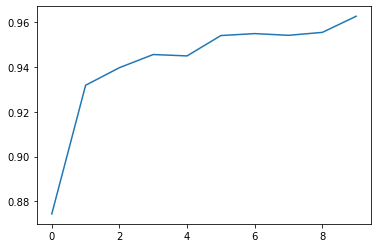

In [30]:
# plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['accuracy'],label = 'loss')

In [31]:
test_labels_pred = model.predict(tf.convert_to_tensor(testx_ref[testx_ref.columns[:-3]]))

72/72 [==============================] - 0s 1ms/step


In [32]:
test_labels_pred = test_labels_pred.round()

In [33]:
testx_ref['fin_act'][testx_ref['fin_act'] < 9.17] = 0
testx_ref['fin_act'][testx_ref['fin_act'] > 9.17] = 1
testx_ref['fin_help'][testx_ref['fin_help'] > -1.15] = 1
testx_ref['fin_help'][testx_ref['fin_help'] < -1.15] = 0
testx_ref['ret'][testx_ref['ret'] < 8.4] = 0
testx_ref['ret'][testx_ref['ret'] > 8.4] = 1

In [34]:
print(testx_ref['fin_act'][testx_ref['fin_act'] == 0].shape[0])
print(testx_ref['fin_help'][testx_ref['fin_help'] == 0].shape[0])
print(testx_ref['ret'][testx_ref['ret'] == 0].shape[0])

1528
1376
1668


In [35]:
print(testx_ref['fin_act'][testx_ref['fin_act'] == 1].shape[0])
print(testx_ref['fin_help'][testx_ref['fin_help'] == 1].shape[0])
print(testx_ref['ret'][testx_ref['ret'] == 1].shape[0])

771
923
631


In [36]:
# Model prediction results
print(confusion_matrix(np.array(testx_ref['fin_act']), test_labels_pred[:,0]))
print(confusion_matrix(np.array(testx_ref['fin_help']), test_labels_pred[:,1]))
print(confusion_matrix(np.array(testx_ref['ret']), test_labels_pred[:,2]))

[[1526    2]
 [ 273  498]]
[[1376    0]
 [ 249  674]]
[[1668    0]
 [ 167  464]]


In [37]:
print("The accuracy for financial actions is: ", sklearn.metrics.accuracy_score(np.array(testx_ref['fin_act']), test_labels_pred[:,0]))
print("The accuracy for financial help is: ", sklearn.metrics.accuracy_score(np.array(testx_ref['fin_help']), test_labels_pred[:,1]))
print("The accuracy for return is: ", sklearn.metrics.accuracy_score(np.array(testx_ref['ret']), test_labels_pred[:,2]))

The accuracy for financial actions is:  0.8803827751196173
The accuracy for financial help is:  0.8916920400173989
The accuracy for return is:  0.9273597216180949


In [38]:
refugee_db = trainx_ref[['fin_act','fin_help','ret']]

In [39]:
refugee_db['record'] = range(1,refugee_db.shape[0]+1)

C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\2043953062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refugee_db['record'] = range(1,refugee_db.shape[0]+1)


In [40]:
reader = snsql.from_df(refugee_db, privacy=privacy,metadata = 'trainx.yaml')

C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsql\sql\reader\pandas.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[sanitized_column_name] = self.df[column_name]
C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsql\sql\private_reader.py:119: UserWarning: Dimension censoring is enabled, with Mechanism.discrete_laplace as the thresholding mechanism. 
This is an unsafe floating point mechanism.  Counts used for censoring will be revealed in any queries that request COUNT DISTINCT(person), 
leading to potential privacy leaks. If your query workload needs to reveal distinct counts of individuals, consider doing the dimension
censoring as a preprocessing step.  See the documentation for more information.
  warnings.warn(


In [41]:
reader.execute('SELECT sum(fin_act) FROM train_data.train_labels group by ret')

[['???'], [1185], [1119]]

In [42]:
reader.execute('SELECT sum(fin_act) FROM train_data.train_labels')

[['???'], [2305]]

In [43]:
refugee_db.drop(columns = ['record'], inplace=True)

C:\Users\mssid\AppData\Local\Temp\ipykernel_13888\1342617162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refugee_db.drop(columns = ['record'], inplace=True)


In [44]:
synth = Synthesizer.create("mwem", epsilon=8.0, verbose=True)

In [45]:
train_data = pd.concat([trainx_ref[trainx_ref.columns[:7]],trainx_ref[trainx_ref.columns[-3:]]],axis = 1)

In [46]:
train_data['index'] = range(1,train_data.shape[0]+1)

In [70]:
# Run this only when you want to generate the synthetic data and it takes around 2-3hrs
trainx_synth = synth.fit_sample(train_data, preprocessor_eps = 1)
print(trainx_synth)

Spent 0.9999999999999998 epsilon on preprocessor, leaving 7.0 for training


C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsynth\mwem.py:570: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6 7 8 9]
Columns: 10
Dimensionality: 1,486,848
Cuboids possible: 1023
1-2-way cuboids possible: 55
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 1457
Per-Measure Epsilon: 0.087
Measurement Error: 26.32

[0] - Average error: 43.978. Selected 4 slices
[1] - Average error: 40.871. Selected 4 slices
[2] - Average error: 35.897. Selected 2 slices
[3] - Average error: 30.424. Selected 2 slices
[4] - Average error: 25.948. Selected 2 slices
[5] - Average error: 21.420. Selected 4 slices
[6] - Average error: 17.574. Selected 4 slices
[7] - Average error: 12.367. Selected 6 slices
[8] - Average error: 10.069. Selected 11 slices
[9] - Average error: 8.278. Selected 4 slices
[10] - Average error: 7.287. Selected 11 slices
[11] - Average error: 5.717. Selected 4 slices
[12] - Average error: 4.733. Selected 16 slices
[13] - Average error: 4.046. Selected 8 slices
[14] - Average error: 3.191. Selected 8 slices
[

In [48]:
train_synth = pd.read_csv('train_synth.csv')

In [54]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [55]:
model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [50]:
history = model_new.fit(tf.convert_to_tensor(train_synth.iloc[:,1:8]),tf.convert_to_tensor(train_synth.iloc[:,-3:]),epochs=10)

Epoch 1/10
288/288 [==============================] - 1s 1ms/step - loss: 0.5164 - accuracy: 0.7539 - precision: 0.5126 - recall: 0.1308
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7628 - precision: 0.5614 - recall: 0.1945
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7656 - precision: 0.5584 - recall: 0.2565
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4984 - accuracy: 0.7637 - precision: 0.5525 - recall: 0.2440
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7664 - precision: 0.5644 - recall: 0.2494
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7664 - precision: 0.5637 - recall: 0.2517
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7692 - precision: 0.5734 - recall: 0.2672
Epoch 8/10
288/288 [=====================

In [51]:
history = model_new.fit(tf.convert_to_tensor(trainx_ref.iloc[:,1:8]),tf.convert_to_tensor(trainx_ref.iloc[:,-3:]),epochs=10)

Epoch 1/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7652 - precision: 0.5989 - recall: 0.1864
Epoch 2/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7773 - precision: 0.6154 - recall: 0.2927
Epoch 3/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7794 - precision: 0.6252 - recall: 0.2954
Epoch 4/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.7807 - precision: 0.6328 - recall: 0.2947
Epoch 5/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4623 - accuracy: 0.7815 - precision: 0.6418 - recall: 0.2865
Epoch 6/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7815 - precision: 0.6363 - recall: 0.2959
Epoch 7/10
288/288 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7829 - precision: 0.6487 - recall: 0.2883
Epoch 8/10
288/288 [=====================

# As we see that the synthetic data generation takes lot of time, let's select the most important features.

In [47]:
from sklearn.feature_selection import SelectKBest, chi2

In [48]:
feature_sel = SelectKBest(score_func=chi2, k=7)

In [49]:
feature_in = list(trainx_ref.columns[:55])

In [50]:
train_new = feature_sel.fit_transform(trainx_ref.iloc[:,:55], trainx_ref.iloc[:,-3:])

In [51]:
impor_feat = feature_sel.get_feature_names_out(feature_in)

In [52]:
impor_feat

array(['hhsize', 's2_q21a_powergrid', 's3_q5a_attendchurch',
       's3_q7_visitother', 's5_q39a_hungryadult', 's5_q40a_skippedadult',
       's5_q40b_skippedchild'], dtype=object)

In [56]:
history = model_new.fit(tf.convert_to_tensor(trainx_ref[impor_feat]),tf.convert_to_tensor(trainx_ref.iloc[:,-3:]),epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 2ms/step - loss: 0.4021 - accuracy: 0.8060 - precision: 0.6461 - recall: 0.4969
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8177 - precision: 0.6708 - recall: 0.5332
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8195 - precision: 0.6712 - recall: 0.5458
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3747 - accuracy: 0.8195 - precision: 0.6752 - recall: 0.5367
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8234 - precision: 0.6878 - recall: 0.5386
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3726 - accuracy: 0.8220 - precision: 0.6865 - recall: 0.5312
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.3690 - accuracy: 0.8227 - precision: 0.6894 - recall: 0.5301
Epoch 8/50
288/288 [=====================

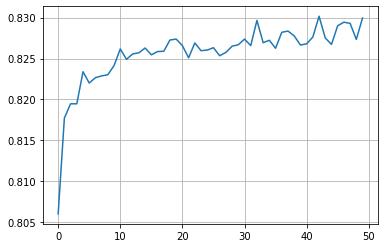

In [57]:
orig_acc = history.history['accuracy'] 
plt.plot(orig_acc,label = 'loss')
plt.grid()

# Generate synthetic data with the important features

In [102]:
synth = Synthesizer.create("mwem", epsilon=30.0, verbose=True)
train_data = pd.concat([trainx_ref[impor_feat],trainx_ref[trainx_ref.columns[-3:]]],axis = 1)
# train_data['index'] = range(1,train_data.shape[0]+1)
trainx_synth = synth.fit_sample(train_data, preprocessor_eps = 5)

Spent 5.0 epsilon on preprocessor, leaving 25.0 for training


C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsynth\mwem.py:570: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6 7 8 9]
Columns: 10
Dimensionality: 829,440
Cuboids possible: 1023
1-2-way cuboids possible: 55
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 1248
Per-Measure Epsilon: 0.312
Measurement Error: 7.37

[0] - Average error: 150.353. Selected 4 slices
[1] - Average error: 135.469. Selected 2 slices
[2] - Average error: 119.703. Selected 2 slices
[3] - Average error: 103.773. Selected 4 slices
[4] - Average error: 91.259. Selected 2 slices
[5] - Average error: 78.094. Selected 6 slices
[6] - Average error: 69.668. Selected 6 slices
[7] - Average error: 56.727. Selected 6 slices
[8] - Average error: 45.319. Selected 5 slices
[9] - Average error: 35.031. Selected 6 slices
[10] - Average error: 22.553. Selected 4 slices
[11] - Average error: 18.692. Selected 4 slices
[12] - Average error: 15.987. Selected 8 slices
[13] - Average error: 14.041. Selected 8 slices
[14] - Average error: 12.007. Selected 10 sli

In [104]:
trainx_synth.to_csv('train_synth_impor_feats.csv')

In [58]:
train_synth = pd.read_csv('train_synth_impor_feats.csv')

In [59]:
train_synth.drop(columns=['Unnamed: 0'],inplace=True)

In [60]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [61]:
history = model_new.fit(tf.convert_to_tensor(train_synth.iloc[:,:7]),tf.convert_to_tensor(train_synth.iloc[:,-3:]),epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 2ms/step - loss: 0.4346 - accuracy: 0.7963 - precision: 0.6452 - recall: 0.3943
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.8064 - precision: 0.6557 - recall: 0.4600
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8072 - precision: 0.6622 - recall: 0.4524
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4100 - accuracy: 0.8075 - precision: 0.6615 - recall: 0.4563
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8079 - precision: 0.6589 - recall: 0.4650
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8114 - precision: 0.6680 - recall: 0.4740
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 0.8109 - precision: 0.6750 - recall: 0.4563
Epoch 8/50
288/288 [=====================

In [62]:
syn30_acc = history.history['accuracy'] 

<span style='color:Blue'> The synthetic data's accuracy as can be seen is 81.7% which is one percent behind the real-data which is very good  </span>

In [111]:
synth = Synthesizer.create("mwem", epsilon=100.0, verbose=True)
train_data = pd.concat([trainx_ref[impor_feat],trainx_ref[trainx_ref.columns[-3:]]],axis = 1)
trainx_synth = synth.fit_sample(train_data, preprocessor_eps = 20)

Spent 20.0 epsilon on preprocessor, leaving 80.0 for training


C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsynth\mwem.py:570: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6 7 8 9]
Columns: 10
Dimensionality: 829,440
Cuboids possible: 1023
1-2-way cuboids possible: 55
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 1216
Per-Measure Epsilon: 1.000
Measurement Error: 2.30

[0] - Average error: 475.293. Selected 4 slices
[1] - Average error: 428.557. Selected 4 slices
[2] - Average error: 376.287. Selected 2 slices
[3] - Average error: 336.544. Selected 2 slices
[4] - Average error: 295.012. Selected 6 slices
[5] - Average error: 248.870. Selected 6 slices
[6] - Average error: 193.870. Selected 4 slices
[7] - Average error: 160.258. Selected 6 slices
[8] - Average error: 129.916. Selected 12 slices
[9] - Average error: 101.479. Selected 4 slices
[10] - Average error: 86.249. Selected 10 slices
[11] - Average error: 60.875. Selected 4 slices
[12] - Average error: 50.986. Selected 8 slices
[13] - Average error: 43.567. Selected 8 slices
[14] - Average error: 36.477. Selecte

In [112]:
trainx_synth.to_csv('train_synth_impor_feats_e100.csv')

In [63]:
train_synth = pd.read_csv('train_synth_impor_feats_e100.csv')

In [64]:
train_synth.drop(columns=['Unnamed: 0'],inplace=True)

In [65]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [66]:
history = model_new.fit(tf.convert_to_tensor(train_synth.iloc[:,:7]),tf.convert_to_tensor(train_synth.iloc[:,-3:]),epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 2ms/step - loss: 0.4329 - accuracy: 0.7958 - precision: 0.6473 - recall: 0.4249
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8046 - precision: 0.6589 - recall: 0.4733
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4171 - accuracy: 0.8056 - precision: 0.6642 - recall: 0.4697
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8063 - precision: 0.6613 - recall: 0.4815
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8086 - precision: 0.6734 - recall: 0.4740
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8116 - precision: 0.6802 - recall: 0.4829
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4081 - accuracy: 0.8105 - precision: 0.6786 - recall: 0.4777
Epoch 8/50
288/288 [=====================

In [67]:
syn100_acc = history.history['accuracy'] 

In [118]:
synth = Synthesizer.create("mwem", epsilon=15.0, verbose=True)
train_data = pd.concat([trainx_ref[impor_feat],trainx_ref[trainx_ref.columns[-3:]]],axis = 1)
trainx_synth = synth.fit_sample(train_data, preprocessor_eps = 3)

Spent 2.9999999999999996 epsilon on preprocessor, leaving 12.0 for training


C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsynth\mwem.py:570: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6 7 8 9]
Columns: 10
Dimensionality: 1,382,400
Cuboids possible: 1023
1-2-way cuboids possible: 55
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 1407
Per-Measure Epsilon: 0.150
Measurement Error: 15.35

[0] - Average error: 70.311. Selected 2 slices
[1] - Average error: 63.220. Selected 2 slices
[2] - Average error: 56.859. Selected 4 slices
[3] - Average error: 49.452. Selected 4 slices
[4] - Average error: 42.807. Selected 6 slices
[5] - Average error: 35.560. Selected 6 slices
[6] - Average error: 29.679. Selected 4 slices
[7] - Average error: 24.336. Selected 10 slices
[8] - Average error: 19.282. Selected 5 slices
[9] - Average error: 14.931. Selected 6 slices
[10] - Average error: 10.123. Selected 4 slices
[11] - Average error: 8.498. Selected 8 slices
[12] - Average error: 7.341. Selected 8 slices
[13] - Average error: 6.186. Selected 10 slices
[14] - Average error: 5.455. Selected 12 slices

In [119]:
trainx_synth.to_csv('train_synth_impor_feats_e15.csv')

In [68]:
train_synth = pd.read_csv('train_synth_impor_feats_e15.csv')

In [69]:
train_synth.drop(columns=['Unnamed: 0'],inplace=True)

In [70]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [71]:
history = model_new.fit(tf.convert_to_tensor(train_synth.iloc[:,:7]),tf.convert_to_tensor(train_synth.iloc[:,-3:]),epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 2ms/step - loss: 0.4318 - accuracy: 0.7971 - precision: 0.6279 - recall: 0.4313
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8033 - precision: 0.6450 - recall: 0.4469
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8070 - precision: 0.6533 - recall: 0.4597
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8058 - precision: 0.6479 - recall: 0.4627
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8092 - precision: 0.6567 - recall: 0.4714
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4125 - accuracy: 0.8099 - precision: 0.6627 - recall: 0.4640
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4102 - accuracy: 0.8119 - precision: 0.6715 - recall: 0.4617
Epoch 8/50
288/288 [=====================

In [72]:
syn15_acc = history.history['accuracy'] 

In [55]:
synth = Synthesizer.create("mwem", epsilon=2.0, verbose=True)
train_data = pd.concat([trainx_ref[impor_feat],trainx_ref[trainx_ref.columns[-3:]]],axis = 1)
trainx_synth = synth.fit_sample(train_data, preprocessor_eps = 1)

Spent 0.9999999999999998 epsilon on preprocessor, leaving 1.0000000000000002 for training


C:\Users\mssid\anaconda3\envs\PET\lib\site-packages\snsynth\mwem.py:570: UserWarning: Data should be preprocessed to have 0 based indices.
  warnings.warn("Data should be preprocessed to have 0 based indices.")


Processing 1 histograms

Histogram #0 split: [0 1 2 3 4 5 6 7 8 9]
Columns: 10
Dimensionality: 2,534,400
Cuboids possible: 1023
1-2-way cuboids possible: 55
Fitting for 40 iterations
Number of queries: 80
Number of slices in queries: 1856
Per-Measure Epsilon: 0.013
Measurement Error: 184.21

[0] - Average error: 5.342. Selected 4 slices
[1] - Average error: 4.731. Selected 4 slices
[2] - Average error: 4.132. Selected 2 slices
[3] - Average error: 3.563. Selected 2 slices
[4] - Average error: 3.099. Selected 2 slices
[5] - Average error: 2.477. Selected 6 slices
[6] - Average error: 2.023. Selected 10 slices
[7] - Average error: 1.780. Selected 6 slices
[8] - Average error: 1.423. Selected 10 slices
[9] - Average error: 1.064. Selected 8 slices
[10] - Average error: 0.995. Selected 11 slices
[11] - Average error: 0.798. Selected 8 slices
[12] - Average error: 0.713. Selected 4 slices
[13] - Average error: 0.594. Selected 10 slices
[14] - Average error: 0.517. Selected 16 slices
[15] - 

In [56]:
trainx_synth.to_csv('train_synth_impor_feats_e2.csv')

In [73]:
train_synth = pd.read_csv('train_synth_impor_feats_e2.csv')
train_synth.drop(columns=['Unnamed: 0'],inplace=True)

In [74]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

model_new.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [75]:
history = model_new.fit(tf.convert_to_tensor(train_synth.iloc[:,:7]),tf.convert_to_tensor(train_synth.iloc[:,-3:]),epochs=50)

Epoch 1/50
288/288 [==============================] - 2s 3ms/step - loss: 0.4393 - accuracy: 0.7971 - precision: 0.6449 - recall: 0.4417
Epoch 2/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4214 - accuracy: 0.8079 - precision: 0.6610 - recall: 0.4946
Epoch 3/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8112 - precision: 0.6634 - recall: 0.5157
Epoch 4/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8104 - precision: 0.6655 - recall: 0.5044
Epoch 5/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8160 - precision: 0.6857 - recall: 0.5038
Epoch 6/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8197 - precision: 0.6992 - recall: 0.5051
Epoch 7/50
288/288 [==============================] - 1s 2ms/step - loss: 0.4005 - accuracy: 0.8206 - precision: 0.6963 - recall: 0.5165
Epoch 8/50
288/288 [=====================

In [76]:
syn2_acc = history.history['accuracy'] 

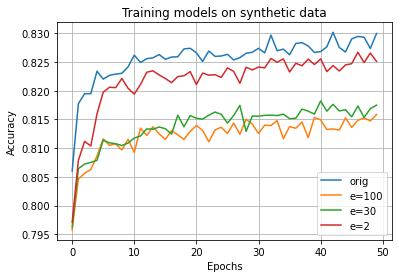

In [80]:
plt.plot(orig_acc,label = 'orig')
plt.plot(syn100_acc,label = 'e=100')
plt.plot(syn30_acc,label = 'e=30')
plt.plot(syn2_acc,label = 'e=2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training models on synthetic data')
plt.grid()
plt.legend()
plt.savefig('synthetic_date_results')